In [4]:
import numpy as np

In [11]:
#vector
v = np.array([1,2,3])

# matrice
A = np.array([[1,2,3], [2,3,5],[2,3,7]])
B = 2 * A
print("Addition:\n", A + B)


Addition:
 [[ 3  6  9]
 [ 6  9 15]
 [ 6  9 21]]


In [14]:
# Matrix Multiplication
dot_product = np.dot(A, B)
dot_product

array([[ 22,  34,  68],
       [ 36,  56, 112],
       [ 44,  68, 140]])

In [116]:
# Identity Matrix
I = np.eye(5)
I

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [117]:
# Zero Matrix
Z = np.zeros((5,3))
Z

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [12]:
# Diagonal Matrix
D = np.diag([1,2,3])
D

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [13]:
# determinant of a matrix
determinant = np.linalg.det(A)
determinant

np.float64(-2.0)

In [46]:
# inverse of a matrix
inverse = np.linalg.inv(A)
print('Inverse\n',inverse)
print('A:\n', A)
print('Inverse*A \n', np.dot(A, inverse))  

Inverse
 [[-3.   2.5 -0.5]
 [ 2.  -0.5 -0.5]
 [ 0.  -0.5  0.5]]
A:
 [[1 2 3]
 [2 3 5]
 [2 3 7]]
Inverse*A 
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [15]:
# if det(A)=0 A is singular, not invertible

In [16]:
np.dot(inverse, A)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

### eigenvalues and eigenvectors

If A.v=lamba.v

**v** is an **eigenvector** and **lambda** is the **eigenvalue**

#### geometric interpretation
- Eigenvectors point in the direction where the matrix transformation stretches or compresses vectors
- Eigenvalues indicate the factor of stretching or compression
- det(A - lambda*I)=0

In [17]:
eigenvalues, eigenvectors = np.linalg.eig(A)

### Matrix Decomposition
breaking a matrix into simpler components to analyze or solve problems

#### Singular Value Decomposition (svd)
**A=U.S.V^T**
- **U**: Left singular vectors
- **S**: Diagonal matrix of singular values (non-negative)
- **V^T**: Right singular vectors

In [124]:
U, S, Vt = np.linalg.svd(A)
print(U)

[[-0.34933571 -0.45862471 -0.81708502]
 [-0.57732763 -0.58148154  0.57321203]
 [-0.73800906  0.67196919 -0.06164445]]


In [125]:
print(S)

[10.64313952  0.81911642  0.2294112 ]


In [126]:
print(Vt)

[[-0.27999342 -0.43640145 -0.85507746]
 [-0.3389621  -0.78839402  0.51336104]
 [ 0.89816946 -0.43357657 -0.07282159]]


In [127]:
# Reconstruct
Sigma = np.zeros((3,3))

np.fill_diagonal(Sigma, S)
#or
diag = np.diag(S)

reconstructed = U @ diag @ Vt
reconstructed


array([[1., 2., 3.],
       [2., 3., 5.],
       [2., 3., 7.]])

### Derivatives

In [18]:
import sympy as sp

In [129]:
x = sp.Symbol("x")
f = x**2

derivative = sp.diff(f, x)
derivative

2*x

### Partial derivatives

**Gradient:** Vector of all partial derivatives, indicating the direction of the steepest ascent

In [130]:
x, y = sp.symbols("x y")
f = x**2 + y**2

grad_x = sp.diff(f, x)
grad_y = sp.diff(f, y)

print(grad_x)
print(grad_y)

2*x
2*y


#### Gradient Deescent Optimization Alghorithm
- Iterative optimization algorithm used to minimize a function
- Updates parameters in the direction of the negative gradient to find the minimum

##### Update Rule: theta = theta - alpha*gradf(theta)
- theta: parameters of the model
- alpha: Learning rate (step size)

In [131]:
# gradient descent function
def gradient_descent(X, y, theta, learning_rate, iteration):
    m = len(y)
    for _ in range(iteration):
        predictions = np.dot(X, theta)
        errors = predictions - y
        gradients = (1/m) * np.dot(X.T, errors)
        theta -= learning_rate * gradients
    return theta

In [132]:
# Sample Data
X = np.array([[1,1], [1,2], [1,3]])
y = np.array([2,2.5,3])

theta = np.array([0.1, 0.1])
learning_rate = 0.1
iteration = 1000

# Performing Algorithm
optimized_theta = gradient_descent(X, y, theta, learning_rate, iteration)
optimized_theta

array([1.49999426, 0.50000253])

### Integrals

- Compute the area under a curve, represanting accumulation

In [156]:
f = x**2
definite_integral = sp.integrate(f, (x, 0, 2))
definite_integral

8/3

In [157]:
indefinite_integral = sp.integrate(f, x)
indefinite_integral

x**3/3

### Optimization Concepts
- Local Minima, Global Minima

#### Convex Func
- f(lambda*x_1 + (1-lambda)x_2) <= lambda*f(x_1) + (1 - lambda)f(x_2) for all lambda element of [0,1]
- Ensures that any local minimum is also a global minumum

#### Non-Convex Functions
- Most neural network loss functions

### Stochastic Gradient Descent (SGD) and Its Variants
- It is a optimization algorithm that uses random subsets of the data to compute gradients and update parameters

##### Why?
- Faster convergence for large data sets compared to batch gradient descent

##### Variants of SGD
- Mini Batch SGD, updates parameters using small batches instead of single examples
- Momentum, adds a fraction of the previous update to current update to accelerate the convergence
- Adam Optimizer, combines momentum with adaptive learning rates for faster convergence

In [158]:
# SGD Implementation
def stochastic_gradient_descent(X, y, theta, learning_rate, n_epocs):
    m = len(y)
    for epoch in range(n_epocs):
        for i in range(m):
            random_index = np.random.randint(m)
            xi = X[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            gradients = 2 * xi.T @ (xi @ theta - yi)
            theta -= learning_rate * gradients

    return theta

In [159]:
#Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Add bias to X
X_b = np.c_[np.ones((100, 1)), X]

# initialize parameters
theta = np.random.randn(2, 1)
learning_rate = 0.01
n_epochs = 50

In [160]:
# Performing SGD
theta_opt = stochastic_gradient_descent(X_b, y, theta, learning_rate, n_epochs)
theta_opt

array([[4.16427183],
       [2.69207144]])

### Probability Theory and Distributions
#### Conditional Probability
The Probability of an event A given B has occured. P(A|B)

#### Bayes' Theorem
**P(A|B)=P(B|A)P(A)/P(B)**
- P(A): Prior Probability
- P(B | A): Likelihood
- P(B): Evidence

In [162]:
def bayes_theorem(prior_probability, likelihood, evidence):
    return (likelihood * prior_probability) / evidence

### Distributions

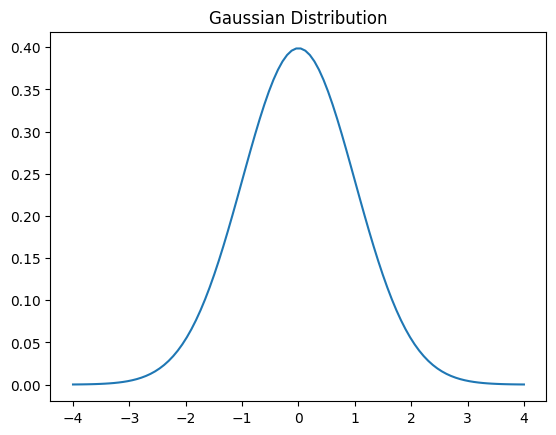

In [208]:
### Gaussian Distribution (Normal Distribution)
import numpy as np
import matplotlib.pyplot as plt

mu, sigma = 0, 1 # mu(mean) sigma(standart deviation)
x= np.linspace(-4, 4, 100)
y = (1 / (np.sqrt(2 * np.pi * sigma**2))) * np.exp(-0.5 * ((x - mu) / sigma)**2)

plt.plot(x, y)
plt.title("Gaussian Distribution")
plt.show()

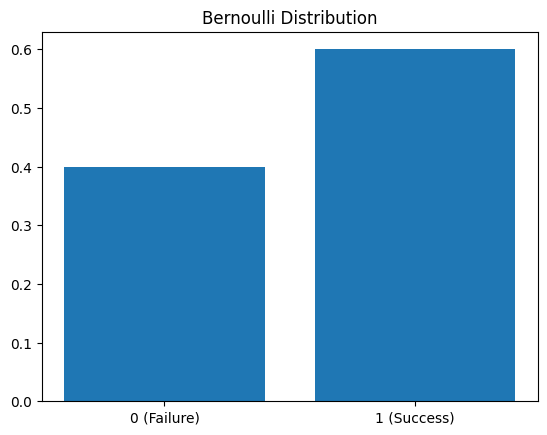

In [174]:
# Bernoulli Distribution (binary experiment)
p = 0.6
plt.bar([0, 1], [1-p, p], )
plt.title("Bernoulli Distribution")
plt.xticks([0, 1], labels=["0 (Failure)", "1 (Success)"])
plt.show()

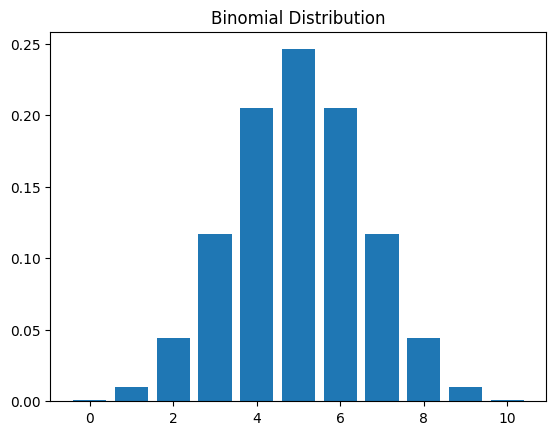

In [176]:
# Binomial Distribution (models the number of successes in n independent Bernoulli trials)
# P(X=k) = Combination(n, k)*p^k*(1-p)^(n-k)

from scipy.stats import binom

n, p = 10, 0.5
x = np.arange(0, n+1)
y = binom.pmf(x, n, p)
plt.bar(x, y)
plt.title("Binomial Distribution")
plt.show()

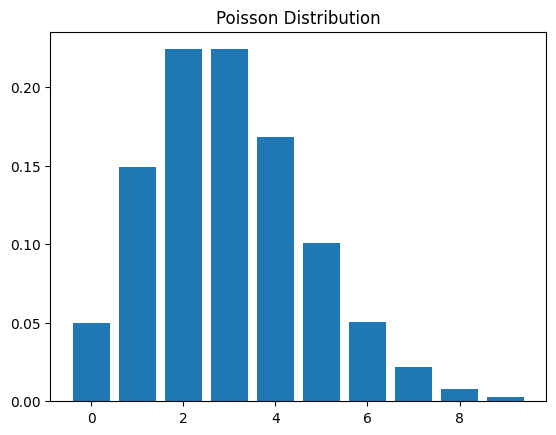

In [191]:
# Poisson Distribution (Models the number of events in a fixed interval of time or space)
# P(X=k) = lambda * exp(-lambda)/k!
from scipy.stats import poisson

lam = 3
x = np.arange(0, 10)
y = poisson.pmf(x, lam)
plt.bar(x, y)
plt.title("Poisson Distribution")
plt.show()

### Applications in ML
#### Gaussian Distribution
- Used in Gaussian Naive Bayes and kernel density estimation
#### Bernoulli Distribution
- Models binary classification problems
#### Binomial Distribution
- Used in logistic reggression to model binary outcomes
#### Poisson Distribution
- Models Models count data

### Stat Fundementals
#### Measures of Central Tendency and Dispersion
##### Central Tendency
- Mean: Average, np.mean(data)
- Median: The middle value
- Mode: The most frequency

#### Dispersion
- Variance: The average squared deviation from the mean, np.var(data)
- Standart Deviation (std_dev): The square root of variance, indicating the spread of data, np.std(data)

In [205]:
data = [10,12,12,14,12,24]
mean = sum(data) / len(data)

variance = sum((x - mean)**2 for x in data) / len(data)
variance

21.333333333333332

In [206]:
standart_deviation = variance ** 0.5
standart_deviation

4.618802153517006

#### Hypothesis Testing
Statistical method to determine whether a result is significant or occured by chance
##### Steps
- Formulate Hypothesis
  - Null Hypothesis (h_0): assumes that no effect or difference is created.
  - Alternative Hypothesis (h_a): assumes an effect or difference exists.
- Calculate Test Statistic
- Determine P-Value (Probability of observing data as extreme as the test statistic under null hypothesis)
- Interpret Results: check if the probability is less than alpha, which is significance level. If less we reject the null hypothesis which means it has some significance.

#### Confidence Interval (CI) and Statistical Significance
##### Confidence Interval
Range of values within which the true population parameter is expected to lie
- **CI = x \pm z * s/sqrt(n)**
  - x: Sample Mean
  - z: Z-score
  - s: standart deviation
  - n: length of the data
##### Statistical Significance
A result is statistically significant if the value is less than the significance level which is alpha equal to 0.05.

In [207]:
import scipy.stats as stats

# 95% Confidence Interval
sample_mean = mean
z_score = 1.96
ci = (sample_mean - z_score * (standart_deviation / len(data) ** 0.5), sample_mean + z_score * (standart_deviation / len(data) ** 0.5))
ci

(10.304188556998312, 17.695811443001688)

In [ ]:
#### T Test
from scipy.stats import ttest_ind

group_1 = [2.1, 2.5, 2.8, 3.0, 3.2]
group_2 = [1.8, 2.0, 2.4, 2.7, 2.9]

t_stat, p_value = ttest_ind(group_1, group_2)

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: significant difference")
else:
    print("Failed to reject the null hypothesis: no significant difference")